# Business Case Study: Aerofit

## Loading data and required modules for analysis

### web-link

In [1]:
FILENAME = 'Aerofit_treadmill.csv'
AEROFIT_WEBLINK = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"

### Load required Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
df = pd.read_csv(AEROFIT_WEBLINK)

Aerofit_treadmill.csv loaded.


## Problem Statement and basic metrics

In [ ]:
1. For each product, create customer profile
    a. Highlight: Differences across products with respective to customer characteristics
2. For each product, Two-way contingency tables, compute all marginal probabilities and insights on business
    a. contingency tables
    b. All conditional and marginal probabilities
    c. comments 

### Basic Metrics

#### Shape of data

In [114]:
# shape of data
df.shape

(180, 9)

In [ ]:
# observation:
we have 180 records of data and 9 columns (features)

#### data types

In [115]:
# data types of each of 9 columns
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [4]:
# store columns of different dtypes seperates for later use (optional)

numerical_variables             = ['Age', 'Education', 'Usage', 'Income', 'Miles'] 
categorical_variables           = ['Product', 'Gender', 'MaritalStatus', 'Fitness']

discrete_numerical_variables    = ['Education', 'Usage']
continuous_numerical_variables  = ['Age', 'Income', 'Miles']

#### Statistical summary

##### Numerical data

In [5]:
# other analysis:
#
pd.DataFrame.from_dict(
    {
        'mean'  : df[numerical_variables].agg('mean'),
        'median': df[numerical_variables].agg('median'),
        'mode'  : df[numerical_variables].agg('mode').loc[0]
    },
    orient='index'
)

,Age,Education,Usage,Income,Miles
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
median,26.000000,16.000000,3.000000,50596.500000,94.000000
mode,25.000000,16.000000,3.000000,45480.000000,85.000000


In [118]:
# measure: mean, std dev, skewness, median
df[numerical_variables].describe()

,Age,Education,Usage,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,53719.577778,103.194444
std,6.943498,1.617055,1.084797,16506.684226,51.863605
min,18.000000,12.000000,2.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,104581.000000,360.000000


In [ ]:
Key Points:
1.  Range for "Age" column is [18 yrs, 50 yrs] with average age as 29.8 years
2.  Range for "Education" is [12 yrs, 21 yrs] with average Education of 15.6 yrs
3.  Range for "Usage" column is [2, 7] (per week) with average usage as 3.4 yrs
5.  Range for "Income" column is [$29562, $104581] with average income as $53719.6
6.  Range for expected walking "Miles" column is [21, 360] miles with average 103 miles

##### Categorical data:

In [119]:
# categories in each of categorical attributes:

data = {
    'categorical_variables': categorical_variables,
    'categories (comma seperated)':[', '.join(df[col].unique().astype('str')) for col in categorical_variables]
}
pd.DataFrame.from_dict(data).set_index('categorical_variables')

,categories (comma seperated)
categorical_variables,
Product,"KP281, KP481, KP781"
Gender,"Male, Female"
MaritalStatus,"Single, Partnered"
Fitness,"4, 3, 2, 1, 5"


### Observation

In [ ]:
we have 180 records of data and 9 columns (features)
Understanding of features:

Product 
	Type:  String, Ordinal Categorical
	Explanation:  As it contains 3 categories (KP281, KP481, or KP781) which can be ordered by price or features 

Age 
	Type:  integer, Discrete Numerical
	Explanation:  As it contains numbers but are not continous. 
	(There aren't infinite 'age' values possible between say 24 and 25) 

Gender 
	Type:  String, Nominal Categorical
	Explanation:  As it contains 2 categories: Male, Female and cannot be ordered 

Education 
	Type:  integer, Discrete Numerical
	Explanation:  As it contains numbers (years) and not continous. 

MaritalStatus 
	Type:  String, Nominal Categorical
	Explanation:  As it contains 2 categories: Single,Partnered and cannot be ordered 

Usage 
	Type:  integer, Discrete Numerical
	Explanation:  As it contains discrete integers between 1 and 7 

Fitness 
	Type:  integer, Ordinal Categorical
	Explanation:  As it contains 1,2,3,4,5 as categories, and can be ordered. 

Income 
	Type:  integer, Continous Numerical
	Explanation:  As many numerical values are possible 

Miles 
	Type:  integer, Continous Numerical
	Explanation:  As many numerical values are possible 

## Value counts and unique attributes

In [120]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [121]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [122]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [123]:
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [124]:
# unique entries (number of categories) in each categorical attrib
df[categorical_variables].nunique()

Product          3
Gender           2
MaritalStatus    2
Fitness          5
dtype: int64

### Observations

In [ ]:
1. For "Product"
    Most frequenct value is "KP281", which implies this is the most bought threadmill product
    Followed by "KP481" and "KP781" respectively
2. There are more male(104) customer than female(73)
3. There are more partnered customers (107)
4. For "Fitness", "3" is the most observed category
5. There are 3 products in the data, 5 Fitness levels as expected

## Missing Values and Outlier detection

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
Observation: There are no null values in all columns

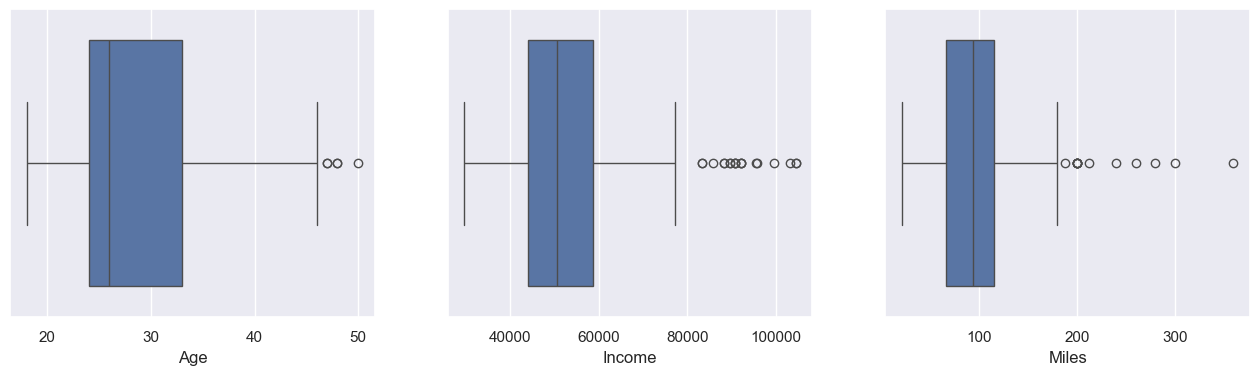

In [126]:
fig, axes = plt.subplots(1, len(continuous_numerical_variables), figsize=(16,4))

i = 0
for col in continuous_numerical_variables:
    sns.boxplot(data=df, x=col, ax=axes[i])
    i += 1

In [127]:
df_out = df[continuous_numerical_variables].quantile([0.25, 0.75])         # get 25th and 75th quantile 
df_out.loc['IQR'] = df_out.loc[0.75] - df_out.loc[0.25]                    # calculate inter quartile range

# minimum threshold for outliers: Q[25] - 1.5*IQR
df_out.loc['OUT_MIN'] = df_out.loc[0.25] - 1.5*df_out.loc['IQR']       

# max threshold for outliers: Q[25] - 1.5*IQR
df_out.loc['OUT_MAX'] = df_out.loc[0.75] + 1.5*df_out.loc['IQR']

# count of outliers less than OUT_MIN
df_out.loc['count(values < OUT_MIN)'] = [(df[c] < df_out.loc['OUT_MIN', c]).sum() for c in df_out.columns]

# count of outliers greater than OUT_MIX
df_out.loc['count(values > OUT_MAX)'] = [(df[c] > df_out.loc['OUT_MAX', c]).sum() for c in df_out.columns]

# total number of vaues 
df_out.loc['Total # of records'] = len(df)

# total count outliers
df_out.loc['Total # of outliers'] = df_out.loc['count(values < OUT_MIN)'] + df_out.loc['count(values > OUT_MAX)']

df_out.loc["% of outliers count"] = 100*df_out.loc['Total # of outliers']/len(df)

df_out

,Age,Income,Miles
0.25,24.000000,44058.750000,66.000000
0.75,33.000000,58668.000000,114.750000
IQR,9.000000,14609.250000,48.750000
OUT_MIN,10.500000,22144.875000,-7.125000
OUT_MAX,46.500000,80581.875000,187.875000
count(values < OUT_MIN),0.000000,0.000000,0.000000
count(values > OUT_MAX),5.000000,19.000000,13.000000
Total # of records,180.000000,180.000000,180.000000
Total # of outliers,5.000000,19.000000,13.000000
% of outliers count,2.777778,10.555556,7.222222


### Observations

In [ ]:
1. For all attributes, there are no missing values 
2. For Age, there are very less outliers,
   For Income, Miles there are more outliers
   NOTE: Please refer table in last cell > row "Total # of outliers" to know number of outliers

## Visual Analysis

### Univariate Analysis

#### Countplots

##### Product type

<Axes: xlabel='Product', ylabel='count'>

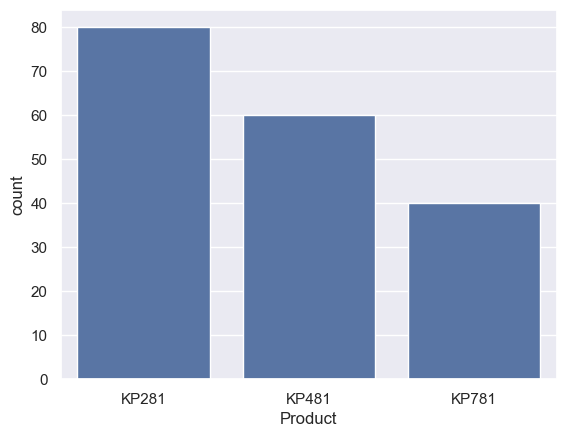

In [128]:
sns.countplot(data=df, x='Product')

In [129]:
df_product_count = df.groupby('Product')[['Product']].count()
df_product_count.index.name = 'Product Type'
df_product_count.rename({'Product': 'Count'}, axis=1, inplace=True)
df_product_count['Price'] = [1500, 1750, 2500]
df_product_count['% of total units sold'] = df_product_count['Count']*100/180
df_product_count['Sales($)'] = df_product_count['Count']*df_product_count['Price']

df_product_count

,Count,Price,% of total units sold,Sales($)
Product Type,,,,
KP281,80,1500,44.444444,120000
KP481,60,1750,33.333333,105000
KP781,40,2500,22.222222,100000


In [ ]:
Comments:
1. KP281 is the most selling product (44.4% of total units sold)
2. Sales from all units almost same

##### Gender

<Axes: xlabel='Gender', ylabel='count'>

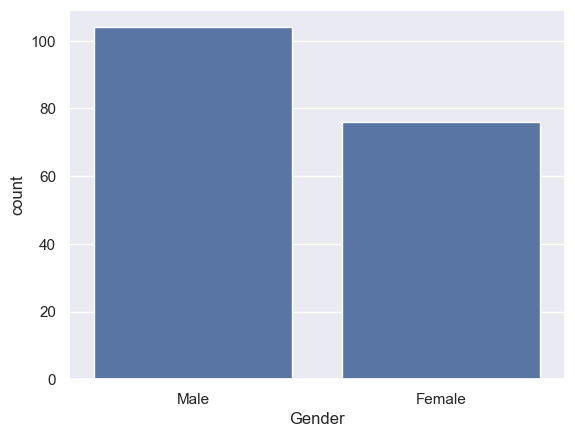

In [130]:
sns.countplot(data=df, x='Gender')

In [131]:
df_gender_count = df.groupby('Gender')[['Gender']].count()
df_gender_count.index.name = 'gender'
df_gender_count.rename({'Gender': 'Count'}, inplace=True, axis=1)
df_gender_count['%'] = df_gender_count['Count']*100/180

df_gender_count

,Count,%
gender,,
Female,76,42.222222
Male,104,57.777778


In [ ]:
Comments:
1. There are slightly more male customers (57.8%) compared to female customers (42.2%)

##### Marital Status

<Axes: xlabel='MaritalStatus', ylabel='count'>

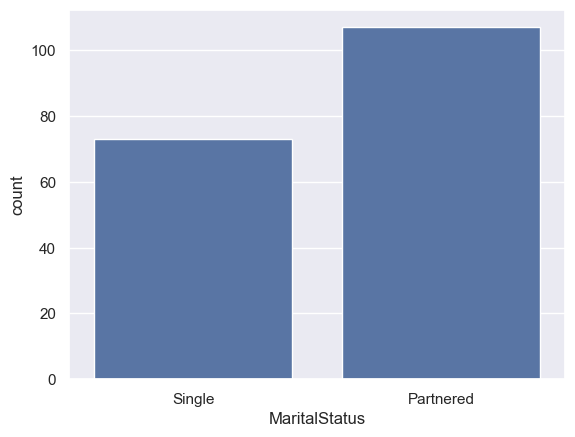

In [132]:
sns.countplot(data=df, x='MaritalStatus')

In [133]:
df_ms_count = df.groupby('MaritalStatus')[['MaritalStatus']].count()
df_ms_count.index.name = 'MaritalStatus '
df_ms_count.rename({'MaritalStatus': 'Count'}, inplace=True, axis=1)
df_ms_count['%'] = df_ms_count['Count']*100/180

df_ms_count

,Count,%
MaritalStatus,,
Partnered,107,59.444444
Single,73,40.555556


In [ ]:
Comment:
Among the customers, more of them are partnered(~60%), about (~40%) of them are single.

##### Fitness Rating

<Axes: xlabel='Fitness', ylabel='count'>

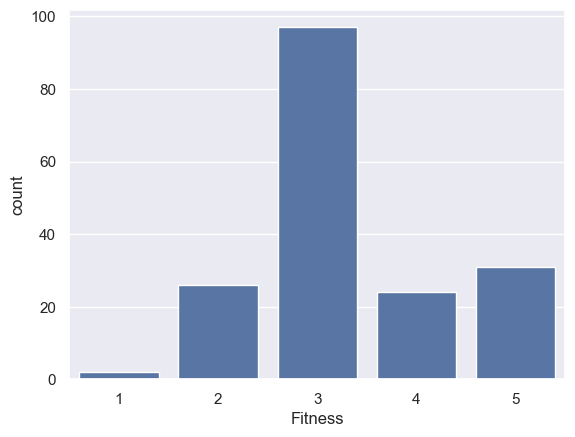

In [134]:
sns.countplot(data=df, x='Fitness')

In [135]:
df_f_count = df.groupby('Fitness')[['Fitness']].count()
df_f_count.index.name = 'Fitness '
df_f_count.rename({'Fitness': 'Count'}, inplace=True, axis=1)
df_f_count['%'] = df_f_count['Count']*100/180

df_f_count

,Count,%
Fitness,,
1,2,1.111111
2,26,14.444444
3,97,53.888889
4,24,13.333333
5,31,17.222222


In [ ]:
Comments:
Most the customers (~ 54%) rate themselves in as 3 in terms of fitness.

##### Usage

<Axes: xlabel='Usage', ylabel='count'>

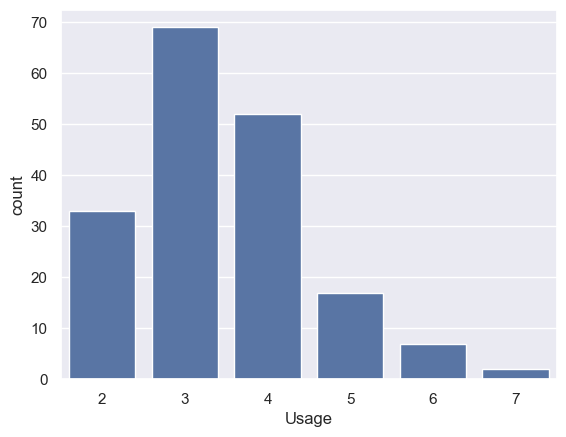

In [136]:
sns.countplot(data=df, x='Usage')

In [137]:
df_u_count = df.groupby('Usage')[['Usage']].count()
df_u_count.index.name = 'Usage '
df_u_count.rename({'Usage': 'Count'}, inplace=True, axis=1)
df_u_count['%'] = df_u_count['Count']*100/180

df_u_count

,Count,%
Usage,,
2,33,18.333333
3,69,38.333333
4,52,28.888889
5,17,9.444444
6,7,3.888889
7,2,1.111111


In [138]:
9.44+3.88+1.11

14.43

In [ ]:
Comments:
1. Around 67% of customers plan to use threadmill 3-4 times a week.
    Where as 
        only 18% customers plan to use threadmill less than 3 times a week and  
        only 14% customers plan to use threadmill more than 4 times a week.

#### Histograms

##### Education

<Axes: xlabel='Education', ylabel='count'>

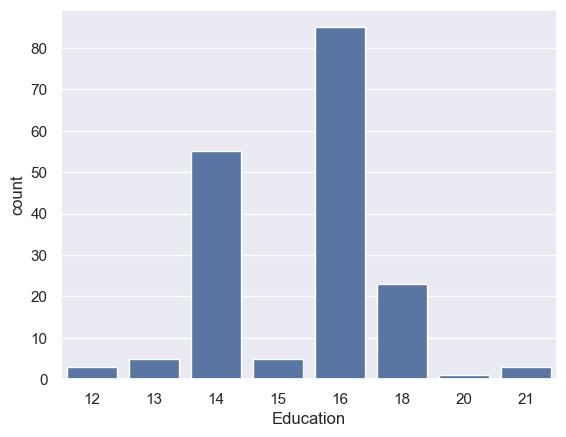

In [139]:
sns.countplot(data=df, x='Education')

<Axes: xlabel='count', ylabel='Education'>

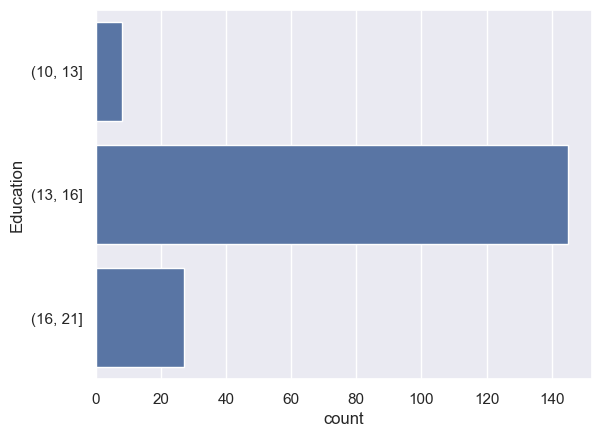

In [140]:
# binning helps us with some inights:

sns.countplot(pd.cut(df['Education'], [10, 13, 16, 21]))

In [141]:
def bins_agg(col, lims):
    buckets = pd.cut(df[col], lims)
    df1 = pd.DataFrame({col: buckets, 'count': df[col]})
    df1 = df1.groupby(col)[['count']].count()
    df1['%'] = df1['count']*100/180
    return df1

bins_agg('Education', [10, 13, 16, 21])

C:\Users\Ravikumar.Gorre\AppData\Local\Temp\ipykernel_16188\1948980971.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df1.groupby(col)[['count']].count()


,count,%
Education,,
"(10, 13]",8,4.444444
"(13, 16]",145,80.555556
"(16, 21]",27,15.000000


In [ ]:
1. Most the customers have 14-to-16 years of education (80.5%)

#### Distplots

##### Age

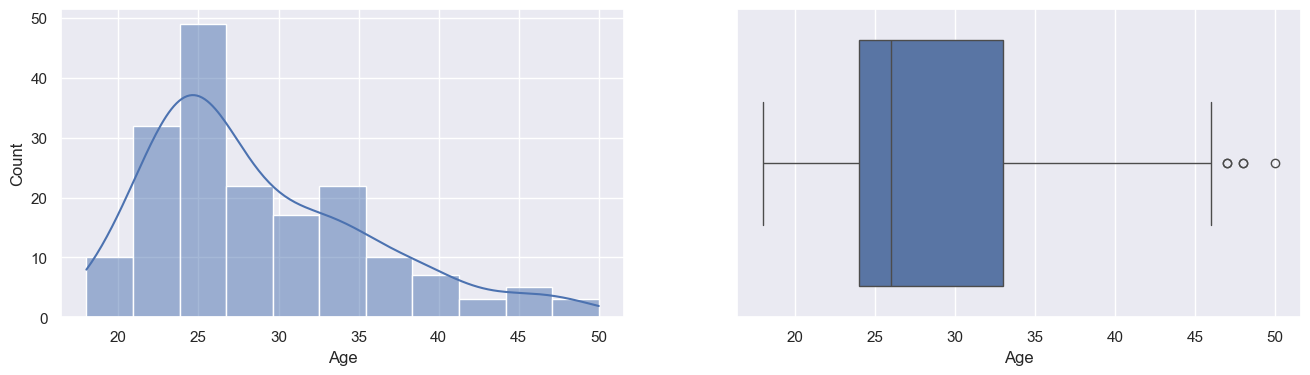

In [142]:
def distnbox(col):
    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    sns.histplot(data=df, x=col, ax=axes[0], kde=True)
    sns.boxplot(data=df, x=col, ax=axes[1])
distnbox('Age')

In [143]:
bins_agg('Age', [10, 20, 30, 40, 50])

C:\Users\Ravikumar.Gorre\AppData\Local\Temp\ipykernel_16188\1948980971.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df1.groupby(col)[['count']].count()


,count,%
Age,,
"(10, 20]",10,5.555556
"(20, 30]",110,61.111111
"(30, 40]",48,26.666667
"(40, 50]",12,6.666667


In [ ]:
Comments:
1. Over 60% of custoemr fall in the age range 21-30 yrs
amd 27% fall in age range 30-40 yrs

##### Income

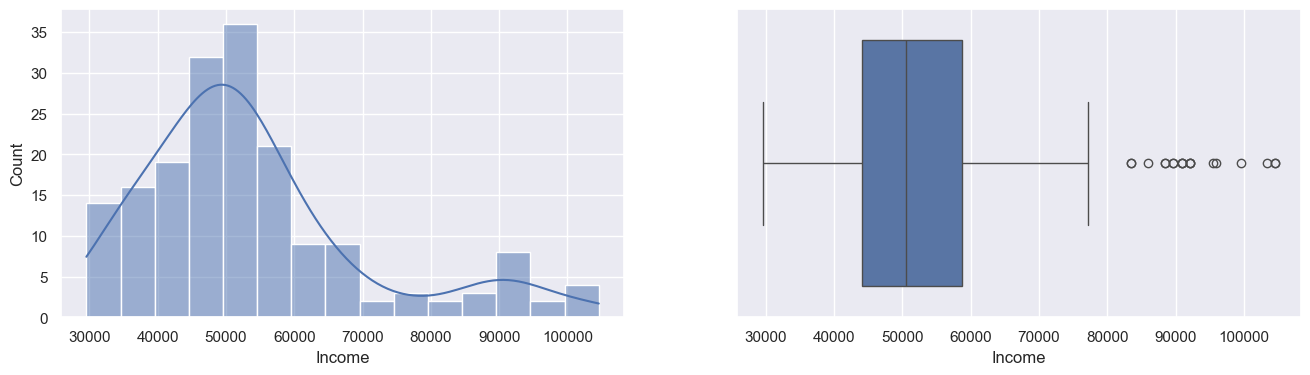

In [144]:
distnbox('Income')

In [145]:
bins_agg('Income', [df['Income'].min(), 40000, 60000, df['Income'].max()])

C:\Users\Ravikumar.Gorre\AppData\Local\Temp\ipykernel_16188\1948980971.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df1.groupby(col)[['count']].count()


,count,%
Income,,
"(29562, 40000]",31,17.222222
"(40000, 60000]",106,58.888889
"(60000, 104581]",42,23.333333


In [ ]:
Comments:
1. 58% of of customers have income around $40000 to $60000
Only 17% are below this range and 23% are above $60000 

##### Miles

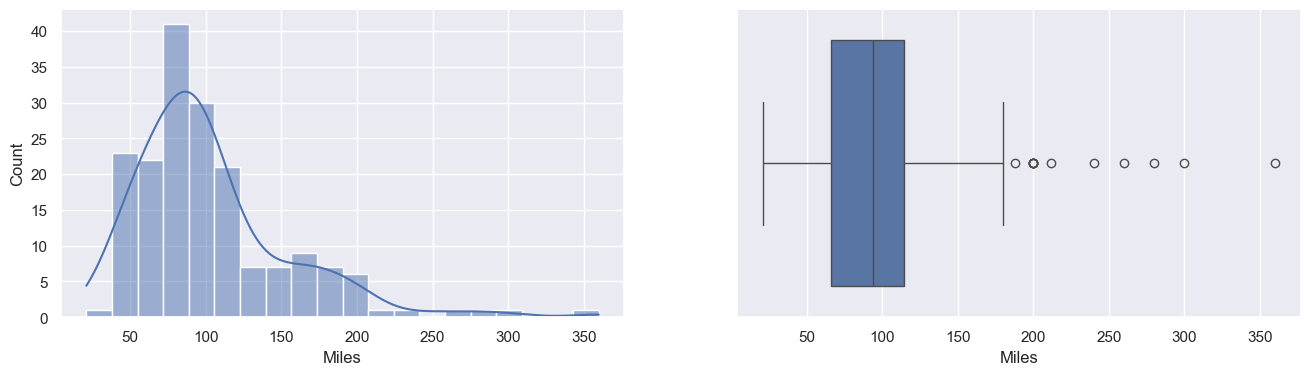

In [146]:
distnbox('Miles')

In [147]:
bins_agg('Miles', [df['Miles'].min(), 100, 200, 300, df['Miles'].max()])

C:\Users\Ravikumar.Gorre\AppData\Local\Temp\ipykernel_16188\1948980971.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df1.groupby(col)[['count']].count()


,count,%
Miles,,
"(21, 100]",113,62.777778
"(100, 200]",60,33.333333
"(200, 300]",5,2.777778
"(300, 360]",1,0.555556


In [ ]:
Comments:
1. Around 96$ customers plan to walk/run less than 200 miles
2. Around 63% customers plan to walk/run less than 100 miles
3. Vert less customers (~4%) plan to walk/run more than 200 miles (High activity)

### Correlation plots

<Axes: >

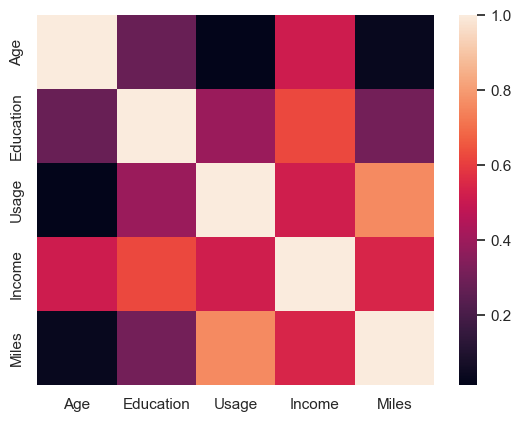

In [148]:
sns.heatmap(df[numerical_variables].corr())

In [149]:
u = df['Gender'].unique().tolist()

In [150]:
df_num = df.copy()
for c in categorical_variables:
    u = df[c].unique().tolist()
    df_num[c] = df[c].apply(lambda x:u.index(x))
df_num.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18,0,14,0,3,0,29562,112
1,0,19,0,15,0,2,1,31836,75
2,0,19,1,14,1,4,1,30699,66
3,0,19,0,12,0,3,1,32973,85
4,0,20,0,13,1,4,2,35247,47


<Axes: >

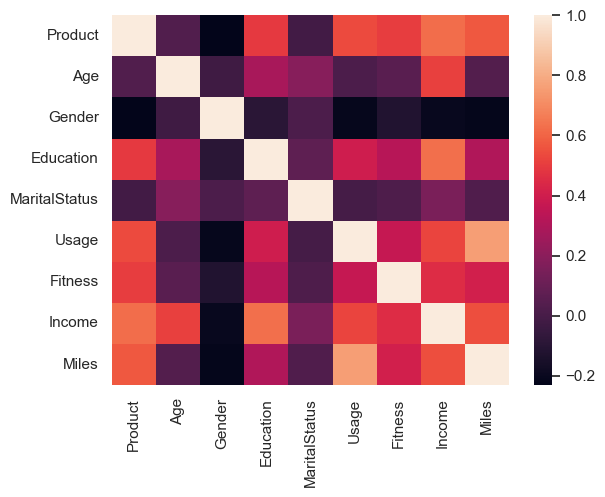

In [151]:
sns.heatmap(df_num.corr())

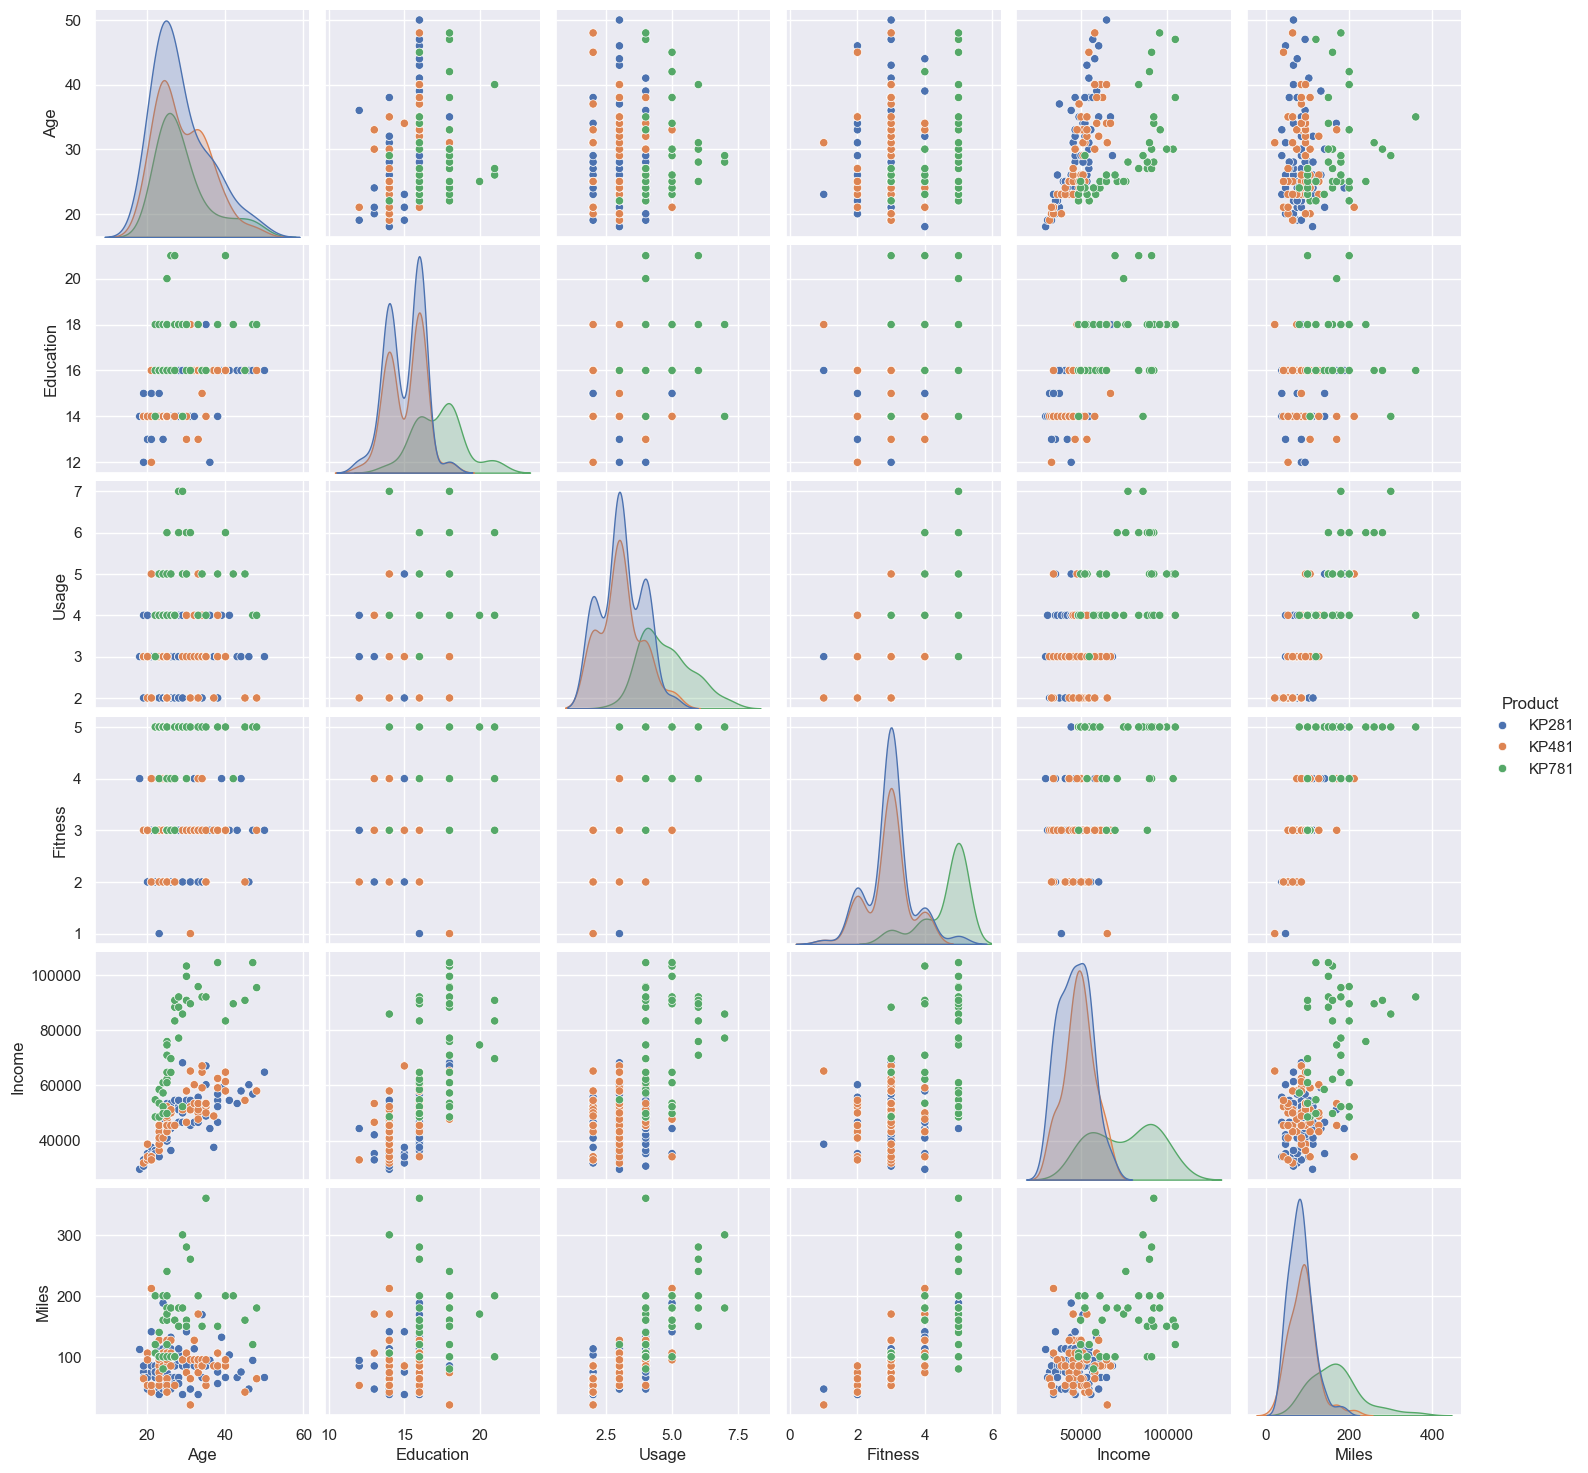

In [152]:
# pair plot for continous numerical variables
sns.pairplot(df, hue='Product')

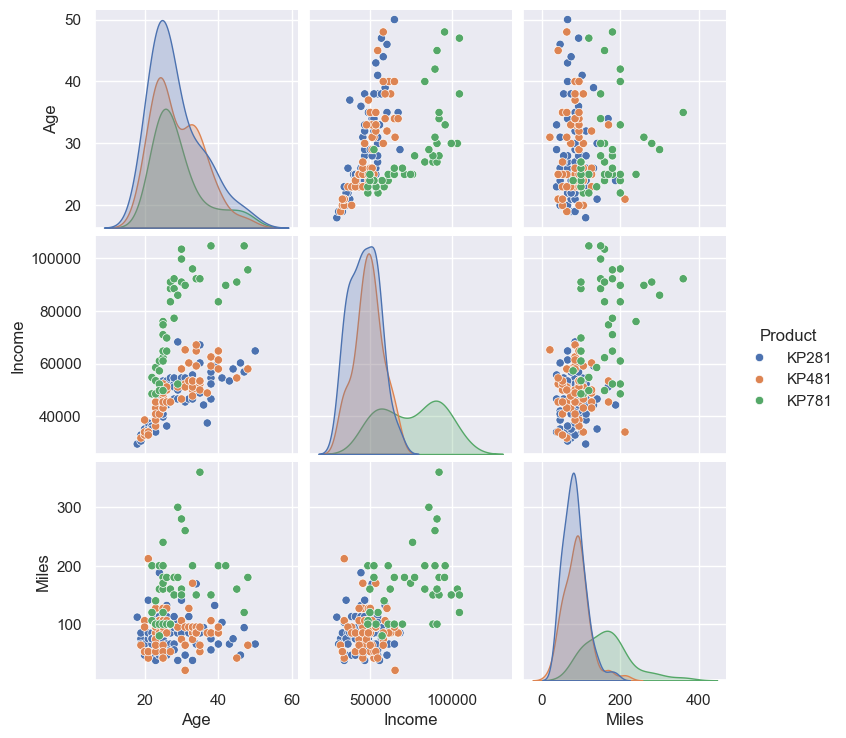

In [153]:
# pair plot for continous numerical variables
sns.pairplot(df[continuous_numerical_variables+['Product']], hue='Product')

In [154]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

##### Summary/Obeservations

In [ ]:
1. Income has correlation with Age and Miles, weak correlation with education
2. Usage has correlation with miles

### Bivariate Analysis

#### Product vs Gender

<Axes: xlabel='Product', ylabel='count'>

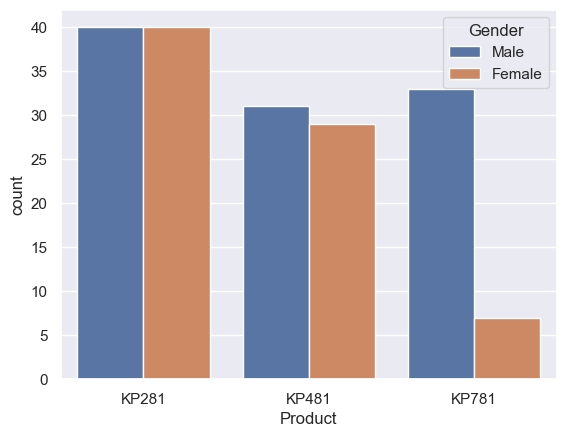

In [155]:
sns.countplot(df, hue='Gender', x='Product')

In [ ]:
Product "KP781" is bought by Male customers more than Female customers
Product "KP481" and "KP281" is bought by both Male and Female customers

#### Product vs Marital Status

<Axes: xlabel='Product', ylabel='count'>

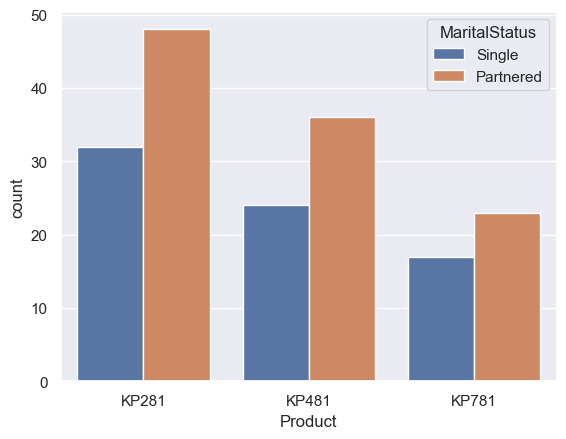

In [156]:
# checking effect of variables on Product purchased:
sns.countplot(df, x='Product', hue='MaritalStatus')

In [ ]:
For All 3 products, 
Customers are observed to be partnered rather than single

#### Product vs Fitness

<Axes: xlabel='Product', ylabel='count'>

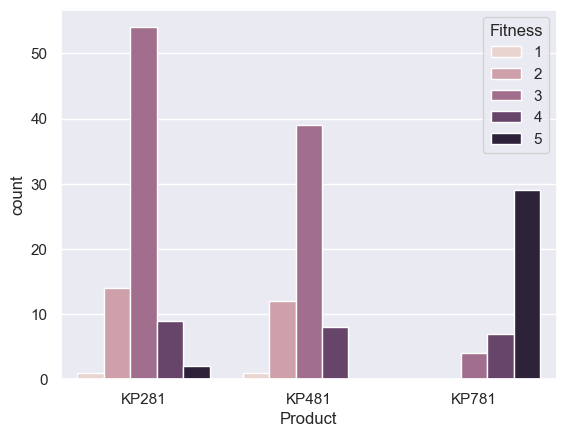

In [157]:
sns.countplot(df, x='Product', hue='Fitness')

In [ ]:
KP281, KP481 are bought by customer who are moderately fit.
Where as KP781 is bought by customer who are very fit.

#### Product vs Usage level

<Axes: xlabel='Product', ylabel='count'>

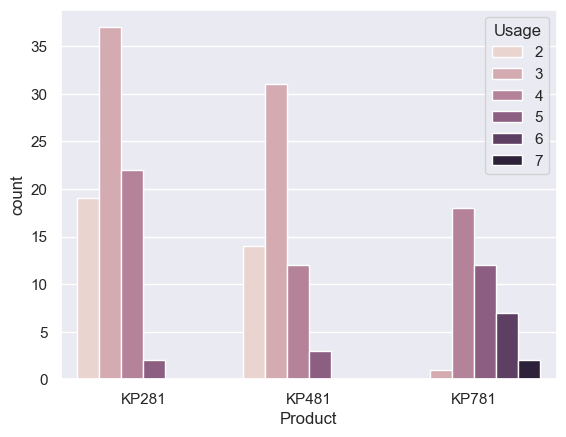

In [158]:
sns.countplot(df, x='Product', hue='Usage')

In [ ]:
For customers with moderate or low usage, prefer KP481 and KP281
But customer with high usage prefer KP481

#### Product vs Age

<Axes: xlabel='Product', ylabel='Age'>

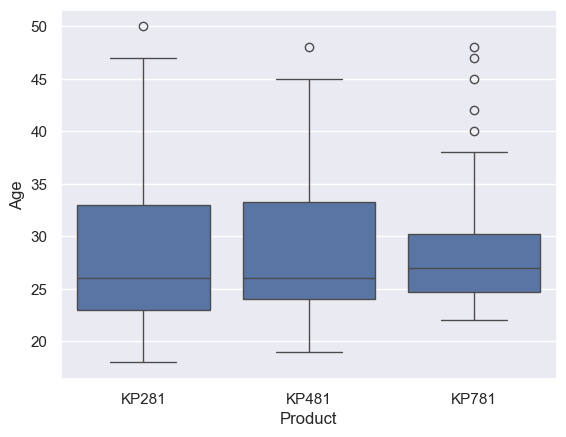

In [6]:
sns.boxplot(df, y='Age', x='Product')

<Axes: xlabel='Age', ylabel='count'>

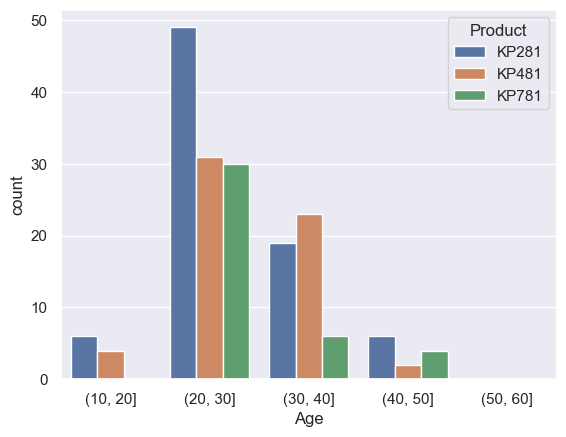

In [8]:
sns.countplot(x=pd.cut(df['Age'], [10,20,30,40,50,60]), hue=df['Product'])

In [ ]:
Comments:
1. Almost all products attract age groups 25-30 
2. 25-30 customers has bought KP281 more than others 

#### Product vs Education

<Axes: xlabel='Education', ylabel='count'>

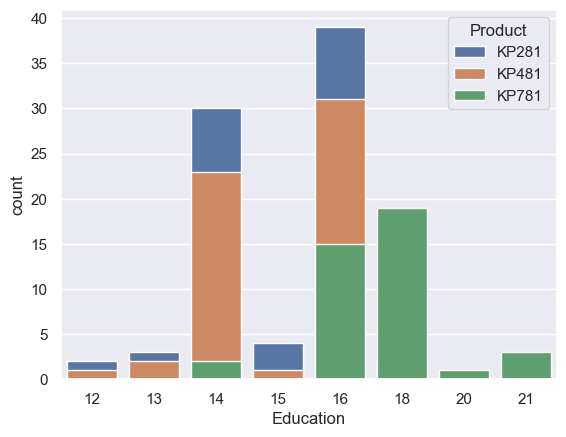

In [160]:
sns.countplot(df, x='Education', dodge=False, hue='Product')

<Axes: xlabel='Education', ylabel='count'>

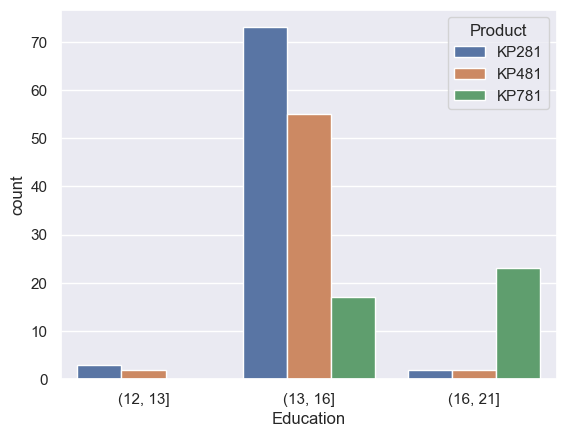

In [13]:
sns.countplot(x=pd.cut(df['Education'], [df['Education'].min(), 13, 16, df['Education'].max()]), hue=df['Product'])

In [ ]:
KP481, KP281 is bought by customers with 14-16 yrs of Education
KP781 is mostly bought by customers with 16-21 yrs

#### Product vs Income

<Axes: xlabel='Product', ylabel='Income'>

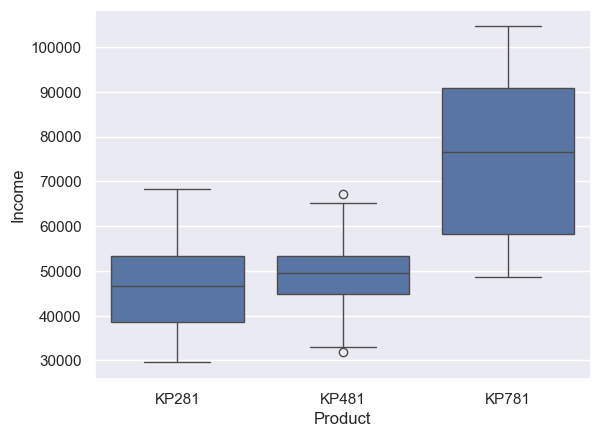

In [161]:
sns.boxplot(df, y='Income', x='Product')

<Axes: xlabel='Income', ylabel='count'>

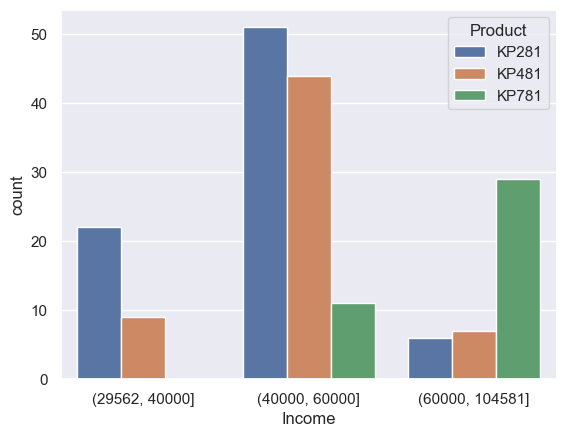

In [14]:
sns.countplot(x=pd.cut(df['Income'], [df['Income'].min(), 40000, 60000, df['Income'].max()]), hue=df['Product'])

In [ ]:
KP781 is bought mostly by customers with high income 
KP481, KP281 are bought mostly by customers with Moderate/Low income

#### Product vs Miles

<Axes: xlabel='Product', ylabel='Miles'>

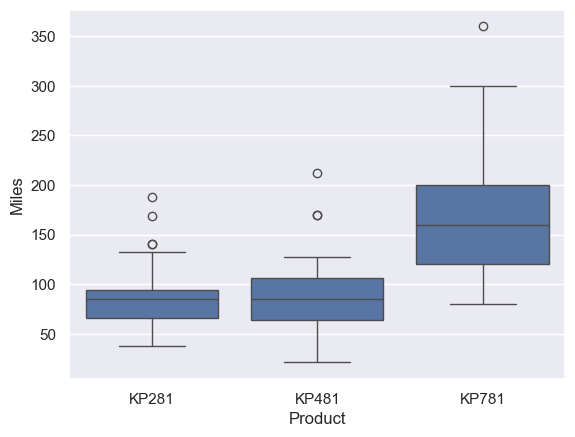

In [162]:
sns.boxplot(df, y='Miles', x='Product')

<Axes: xlabel='Miles', ylabel='count'>

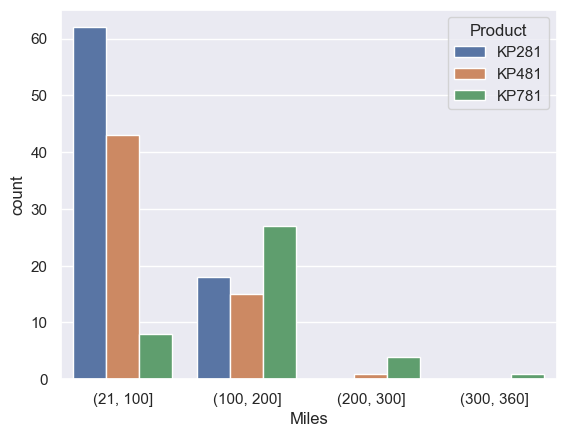

In [20]:
sns.countplot(x=pd.cut(df['Miles'], [df['Miles'].min(), 100, 200, 300, df['Miles'].max()]), hue=df['Product'])

In [ ]:
Comment:
KP781 is bought mostly by customers with high "Miles" (Expected Walking distance) 
KP 481, KP 281 are bought mostly by customers with Moderate/Low "Miles" value

#### Observations

In [ ]:
Combined Summary for Bivariate Analasis against product type:

1. On the overall, Partnered customers buy more products. 

2. Product "KP781" is bought by Male customers more than Female customers
Otherwise There is not much correlation between Product Type and Gender

3. KP281, KP481 are bought by customer who are moderately fit or less fit.
Where as KP781 is bought by customer who are very fit.

4. High usage: KP781
Moderate usage: KP481, KP281

5. Almost all products attract age groups 25-30 

6. KP781 is bought mostly by customers with high income 
KP481, KP281 are bought mostly by customers with Moderate/Low income

7. KP781 is bought mostly by customers with high "Miles" (Expected Walking distance) 
KP 481, KP 281 are bought mostly by customers with Moderate/Low "Miles" value

<Axes: xlabel='Usage', ylabel='Income'>

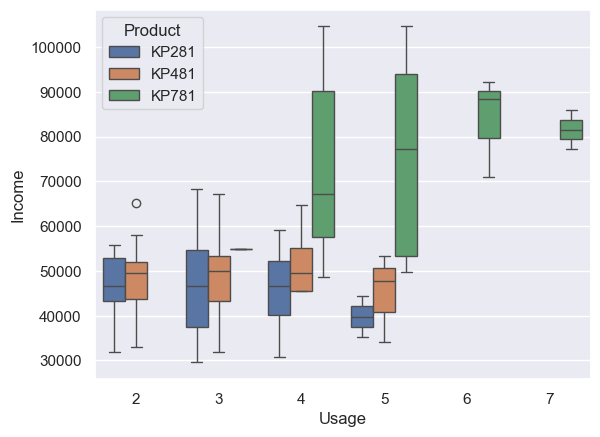

In [163]:
sns.boxplot(hue=df['Product'], x=df['Usage'], y=df['Income'])

## Customer Profiles

### KP281

In [ ]:
Example Customer Profile for "KP281":

Fitness         : 2-4 on scale of 5
Usage           : 2-4 times a week
Age             : 20-40
Education       : 13+ years
Income          : Low, Range: [30000 to 50000]
Miles           : 50-100

NOTE:
(Product "KP281" is bought by both Male and Female customers, so Age is omitted)
(Product "KP281" is bought by both Partnered and Single customers, so MaritalStatus is omitted)

### KP481

In [ ]:
Example Customer Profile for "KP481":

Fitness         : 2-4 on scale of 5
Usage           : 2-4 times a week
Age             : 20-40
Education       : 14-16
Income          : Moderate, Range: [40000 to 60000]
Miles           : 50-100

(Although Product "KP481" is bought by both Male and Female customers, Gender: Male is taken as example)
(Although Product "KP481" is bought by both Partnered and Single customers, MaritalStatus: Partnered is taken as example)

### KP781

In [ ]:
Example Customer Profile for "KP781":

Gender          : Male
Fitness         : 4-5 on scale of 5 (Very fit)
Usage           : 4-6 (High Usage) 
Age             : 20-30
Education       : 16-21 (High) 
Income          : High, Range: [60000 to 90000]
Miles           : 100-200 (High)

## Probability

### Marginal Probabilities

In [164]:
# total count of purchases by Product
df.groupby('Product')[['Product']].count()

,Product
Product,
KP281,80
KP481,60
KP781,40


In [165]:
# divide this by total purchases (180) to get probabilities
df_MP = df.groupby('Product')[['Product']].count()/180

# string
df_MP[''] = 'Probability that the customer buys ' + df_MP.index + ' ='

# remove index, not useful
df_MP.reset_index(drop=True, inplace=True)

# present!
df_MP[['', 'Product']]

,,Product
0,Probability that the customer buys KP281 =,0.444444
1,Probability that the customer buys KP481 =,0.333333
2,Probability that the customer buys KP781 =,0.222222


In [ ]:
Probability of customers buying lower end model KP281 is higher than that of other products
Probability of customers buying higher end model KP781 is lower than that of other products

### Conditional Probabilities

In [166]:
# pd.crosstab()
df_cross_PG = pd.crosstab(df['Product'], df['Gender'], margins=True)
df_cross_PG

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [167]:
# Probability that a customer buys KP281 given that he is male:
df_cross_PG.loc['KP281', 'Male']/df_cross_PG.loc['All', 'Male']

0.38461538461538464

In [168]:
# automating calculating conditional probabilities 
def conditional_prob(bool1, bool2, df=df):
    col1, A = bool1.split('=')
    col2, B = bool2.split('=')
    df_cross = pd.crosstab(df[col1], df[col2], margins=True)
    return df_cross.loc[A, B]/df_cross.loc['All', B]

In [169]:
# Probability that a customer buys KP281 given that he is male:
# testing if the above function works, As expected it should be 0.38 (As calculated 2 cells ago)
conditional_prob('Product=KP281', 'Gender=Male')

0.38461538461538464

In [170]:
# cross product of 2 sets

def cross(arr1, arr2):
    result = []
    for i in range(len(arr1)):
        for j in range(len(arr2)):
            result.append((arr1[i], arr2[j]))
    return result

# get all possibilities
cross(df['Product'].unique(), df['Gender'].unique())

[('KP281', 'Male'),
 ('KP281', 'Female'),
 ('KP481', 'Male'),
 ('KP481', 'Female'),
 ('KP781', 'Male'),
 ('KP781', 'Female')]

In [171]:
# give a dataframe, column-names var1, var2
# this function is for:
# calculate all probabilities P(A/B) for A in var1 and B in var2

def calculate_all_conditional_probabilities(var1, var2, df=df):
    var1_categories = np.sort(df[var1].unique())
    var2_categories = np.sort(df[var2].unique())
    groups = cross(var1_categories, var2_categories)
    data = []
    for A, B in groups:
        bool1 = var1 + '=' + A
        bool2 = var2 + '=' + B
        p_str = f'Customer buys {A} given {bool2}'
        p = conditional_prob(bool1, bool2, df)
        data.append(('Probability that:', p_str, p))
    return pd.DataFrame(data, columns=['', 'Condition', 'Probability'])

In [172]:
pd.crosstab(df['Product'], df['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [173]:
calculate_all_conditional_probabilities('Product', 'Gender')

,,Condition,Probability
0,Probability that:,Customer buys KP281 given Gender=Female,0.526316
1,Probability that:,Customer buys KP281 given Gender=Male,0.384615
2,Probability that:,Customer buys KP481 given Gender=Female,0.381579
3,Probability that:,Customer buys KP481 given Gender=Male,0.298077
4,Probability that:,Customer buys KP781 given Gender=Female,0.092105
5,Probability that:,Customer buys KP781 given Gender=Male,0.317308


In [ ]:
# Observations:
1. Female customers tend to buy KP281 more than KP781

In [174]:
pd.crosstab(df['Product'], df['MaritalStatus'], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [175]:
calculate_all_conditional_probabilities('Product', 'MaritalStatus')

,,Condition,Probability
0,Probability that:,Customer buys KP281 given MaritalStatus=Partnered,0.448598
1,Probability that:,Customer buys KP281 given MaritalStatus=Single,0.438356
2,Probability that:,Customer buys KP481 given MaritalStatus=Partnered,0.336449
3,Probability that:,Customer buys KP481 given MaritalStatus=Single,0.328767
4,Probability that:,Customer buys KP781 given MaritalStatus=Partnered,0.214953
5,Probability that:,Customer buys KP781 given MaritalStatus=Single,0.232877


In [176]:
# Lets bucket age groups from the insights obtained from univariate and bivariate analysis

# create a copy of dataframe
df_bins = df.copy()

In [177]:
# convert Fitness and Usage into strings so as to use the functions I defined
df_bins['Fitness'] = df['Fitness'].astype('string')
df_bins['Usage'] = df['Usage'].astype('string')

In [178]:
pd.crosstab(df['Product'], df['Fitness'], margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [179]:
calculate_all_conditional_probabilities('Product', 'Fitness', df_bins)

,,Condition,Probability
0,Probability that:,Customer buys KP281 given Fitness=1,0.500000
1,Probability that:,Customer buys KP281 given Fitness=2,0.538462
2,Probability that:,Customer buys KP281 given Fitness=3,0.556701
3,Probability that:,Customer buys KP281 given Fitness=4,0.375000
4,Probability that:,Customer buys KP281 given Fitness=5,0.064516
5,Probability that:,Customer buys KP481 given Fitness=1,0.500000
6,Probability that:,Customer buys KP481 given Fitness=2,0.461538
7,Probability that:,Customer buys KP481 given Fitness=3,0.402062
8,Probability that:,Customer buys KP481 given Fitness=4,0.333333
9,Probability that:,Customer buys KP481 given Fitness=5,0.000000


In [ ]:
1. Customers with high fitness rating tend to buy KP781
2. 

In [180]:
calculate_all_conditional_probabilities('Product', 'Usage', df_bins)

,,Condition,Probability
0,Probability that:,Customer buys KP281 given Usage=2,0.575758
1,Probability that:,Customer buys KP281 given Usage=3,0.536232
2,Probability that:,Customer buys KP281 given Usage=4,0.423077
3,Probability that:,Customer buys KP281 given Usage=5,0.117647
4,Probability that:,Customer buys KP281 given Usage=6,0.000000
5,Probability that:,Customer buys KP281 given Usage=7,0.000000
6,Probability that:,Customer buys KP481 given Usage=2,0.424242
7,Probability that:,Customer buys KP481 given Usage=3,0.449275
8,Probability that:,Customer buys KP481 given Usage=4,0.230769
9,Probability that:,Customer buys KP481 given Usage=5,0.176471


In [181]:
# convertin age into buckets:
# Binning age into bins : 10-20, 20-30, 30-40, 40-50

age_bucket = lambda x: f'{np.int32(np.floor(x/10)*10)}-{np.int32(np.floor(x/10)*10+10)}'

df_bins['Age'] = df['Age'].apply(age_bucket)
# df_bins

In [182]:
calculate_all_conditional_probabilities('Product', 'Age', df_bins)

,,Condition,Probability
0,Probability that:,Customer buys KP281 given Age=10-20,0.800000
1,Probability that:,Customer buys KP281 given Age=20-30,0.453704
2,Probability that:,Customer buys KP281 given Age=30-40,0.400000
3,Probability that:,Customer buys KP281 given Age=40-50,0.375000
4,Probability that:,Customer buys KP281 given Age=50-60,1.000000
5,Probability that:,Customer buys KP481 given Age=10-20,0.200000
6,Probability that:,Customer buys KP481 given Age=20-30,0.296296
7,Probability that:,Customer buys KP481 given Age=30-40,0.440000
8,Probability that:,Customer buys KP481 given Age=40-50,0.312500
9,Probability that:,Customer buys KP481 given Age=50-60,0.000000


<Axes: xlabel='Age', ylabel='count'>

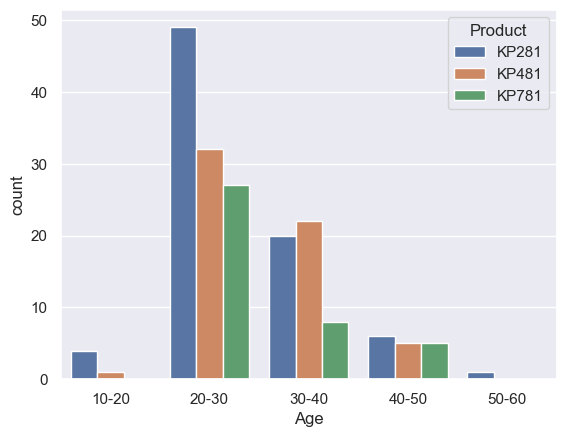

In [183]:
sns.countplot(df_bins, x='Age', hue='Product')

In [68]:
# Education:
# Binning:
#   Less    : < 14 years
#   Moderate: 14 to 17 years
#   High    : > 18 years
 
edu_bucket = lambda x: 'Less' if x < 14 else ('Moderate' if x < 17 else 'High')

df_bins['Education'] = df['Education'].apply(edu_bucket)
# df_bins

In [69]:
calculate_all_conditional_probabilities('Product', 'Education', df_bins)

,,Condition,Probability
0,Probability that:,Customer buys KP281 given Education=High,0.074074
1,Probability that:,Customer buys KP281 given Education=Less,0.625000
2,Probability that:,Customer buys KP281 given Education=Moderate,0.503448
3,Probability that:,Customer buys KP481 given Education=High,0.074074
4,Probability that:,Customer buys KP481 given Education=Less,0.375000
5,Probability that:,Customer buys KP481 given Education=Moderate,0.379310
6,Probability that:,Customer buys KP781 given Education=High,0.851852
7,Probability that:,Customer buys KP781 given Education=Less,0.000000
8,Probability that:,Customer buys KP781 given Education=Moderate,0.117241


In [70]:
# income bracket:
#   Less    :   < 40000
#   Moderate:   40000 to 60000
#   High    :   > 60000

income_bucket = lambda x: 'Less' if x < 40000 else ('Moderate' if x < 60000 else 'High')

df_bins['Income'] = df['Income'].apply(income_bucket)
# df_bins

In [71]:
calculate_all_conditional_probabilities('Product', 'Income', df_bins)

,,Condition,Probability
0,Probability that:,Customer buys KP281 given Income=High,0.142857
1,Probability that:,Customer buys KP281 given Income=Less,0.718750
2,Probability that:,Customer buys KP281 given Income=Moderate,0.481132
3,Probability that:,Customer buys KP481 given Income=High,0.166667
4,Probability that:,Customer buys KP481 given Income=Less,0.281250
5,Probability that:,Customer buys KP481 given Income=Moderate,0.415094
6,Probability that:,Customer buys KP781 given Income=High,0.690476
7,Probability that:,Customer buys KP781 given Income=Less,0.000000
8,Probability that:,Customer buys KP781 given Income=Moderate,0.103774


## Business Insights

### KP281

In [ ]:
1. Given that 72% of customers with low income buy KP281, 
    And it has high sales in the 20-30 yrs Age groups. 
This product targets the lower income groups. To help target this segment better, 
we can implement flexible payment plans so that customers can pay in installments.

### KP481

In [ ]:
1. Sales for all 3 products is less in the higher age bracket [40+] compared to the lower age brackets [20-30]
KP481, being a mid-level-runner models can be improved by adding features like heart-rate monitors, 
personalised workout modes etc. to attract such age groups and position this product better.

2. Adding such differerentiators is important also because the customer demographics of KP281 and KP481 overlapp 
to a significant extent. 

### KP781

In [ ]:
1. Only 17% of customers who buy KP781 are female, we can improve this metric 
by encourage female customers to buy this product, via special promotions/discounts 
targeting corresponding segment.

2. KP781 is not bought by customers with self-rated-fitness rating 1-3  
it is recommended to emphasize the benifits and features of KP781 on how it can help 
the segment of customers who are not in excellent shape in it's advertising campaigns. 